Import scripts with necessary imports and filter functions

In [1]:
from imports import*
from filters import*

import original data from external file

In [2]:
name_file = 'ppg512hz_share'
df = pd.read_json(name_file)

print dataframe

In [3]:
df

,filename,ppg,start_idx,stop_idx,type,fs,quality
0,D:\reports_andrea_arig\5dd92d71cb8df52fd0fa409...,"[0.9339097826, 1.1051404952, 0.993995535400000...",64,2560,butterflife,512,1
1,D:\reports_andrea_arig\5dd92d71cb8df52fd0fa409...,"[0.6884507779, 0.94884731, 1.0807800741, 1.359...",2560,5120,butterflife,512,1
2,D:\reports_andrea_arig\5dd92d71cb8df52fd0fa409...,"[-0.6163397190000001, -0.3491389079, -0.380796...",5120,7680,butterflife,512,1
3,D:\reports_andrea_arig\5dd92d71cb8df52fd0fa409...,"[-0.0006849014, -0.0228018582, 0.0433085311, 0...",7680,10240,butterflife,512,1
4,D:\reports_andrea_arig\5dd92d71cb8df52fd0fa409...,"[0.2374071567, 0.2944598586, 0.2575444126, -0....",10240,12800,butterflife,512,1
...,...,...,...,...,...,...,...
7120,D:\reports_andrea_arig\5ddd4b36bae98a1239a7b5e...,"[20.9431075294, 21.3310798414, 21.8957401997, ...",38400,40960,butterflife,512,3
7121,D:\reports_andrea_arig\5ddd4b36bae98a1239a7b5e...,"[38.9834168663, 37.903640406, 36.414987683, 34...",40960,43520,butterflife,512,3
7122,D:\reports_andrea_arig\5ddd4b36bae98a1239a7b5e...,"[-22.2013931679, -20.9324633853, -19.875204132...",43520,46080,butterflife,512,3
7123,D:\reports_andrea_arig\5ddd4b36bae98a1239a7b5e...,"[4.8042614285, 4.8700990375, 5.0196938505, 4.9...",46080,48640,butterflife,512,3


plot one poor quality 5-second time series

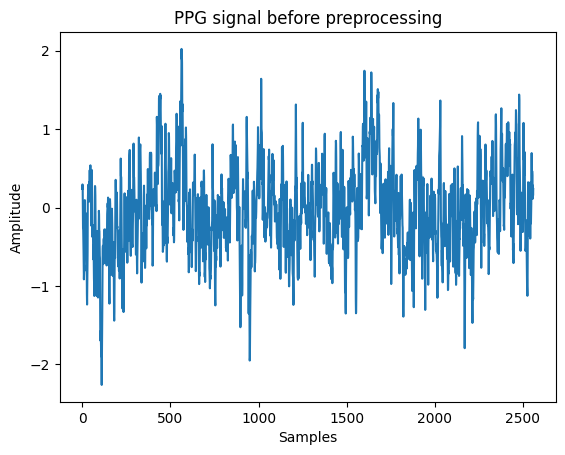

In [4]:
plt.plot(df["ppg"][4])
plt.title('PPG signal before preprocessing')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
plt.close()

creation of the dataset from the dataframe

In [5]:
X = df['ppg'].values
y = df['quality'].values

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.5, random_state=42)

In [7]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1533,)
X_test shape: (2045,)
X_val shape: (1533,)
y_train shape: (1533,)
y_test shape: (2045,)
y_val shape: (1533,)


Check class distribution percentages in each set

In [8]:
train_class_percentages = np.bincount(y_train) / len(y_train) * 100
val_class_percentages = np.bincount(y_val) / len(y_val) * 100
test_class_percentages = np.bincount(y_test) / len(y_test) * 100

print("\nTraining Set Class Percentages:")
print(train_class_percentages)
print("\nValidation Set Class Percentages:")
print(val_class_percentages)
print("\nTest Set Class Percentages:")
print(test_class_percentages)


Training Set Class Percentages:
[ 0.         21.7221135  15.78604044 62.49184605]

Validation Set Class Percentages:
[ 0.         22.4396608  16.96020874 60.60013046]

Test Set Class Percentages:
[ 0.         23.17848411 16.87041565 59.95110024]


Apply each preprocessing step in sequence one after the other

In [9]:
# Downsampling factor
downsample_factor = 4

# Initialize a list to store downsampled PPG signals
downsampled_ppg_signals = []

# Iterate over each PPG signal and apply downsampling
for signal in X:
    # Convert the signal to a numpy array if it's not already
    signal = np.array(signal)
    # Downsample the signal by selecting every 'downsample_factor'-th sample
    downsampled_signal = signal[::downsample_factor]
    # Append the downsampled signal to the list
    downsampled_ppg_signals.append(downsampled_signal)

# downsampled_ppg_signals now contains the downsampled PPG signals

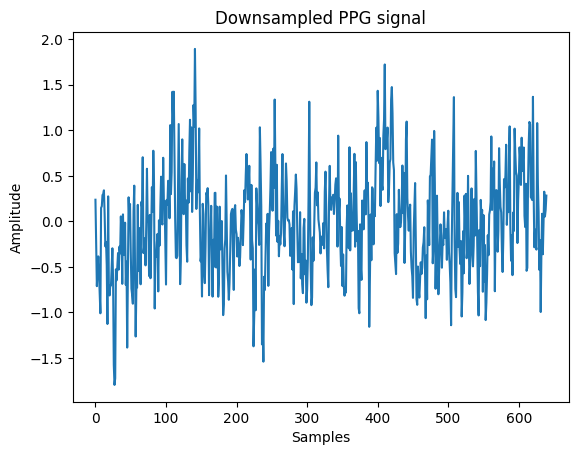

In [10]:
plt.plot(downsampled_ppg_signals[4])
plt.title('Downsampled PPG signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
plt.close()

In [11]:
# Assuming downsampled and scaled PPG signals are stored in scaled_ppg_signals
# scaled_ppg_signals should be a list where each element is a scaled signal array

# Apply moving average filter to each scaled PPG signal
window_size = 5  # Adjust the window size as needed
smoothed_ppg_signals = []

for signal in downsampled_ppg_signals:
    smoothed_signal = apply_moving_average(signal, window_size)
    smoothed_ppg_signals.append(smoothed_signal)

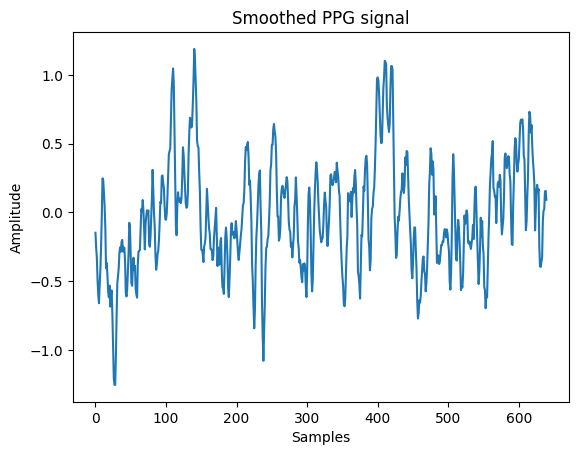

In [12]:
plt.plot(smoothed_ppg_signals[4])
plt.title('Smoothed PPG signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
plt.close()

In [13]:
filtered_ppg_signals = []

fs = 512  # Sampling frequency
cutoff_freq = 50  # Cutoff frequency in Hz
order = 4  # Filter order

for signal in smoothed_ppg_signals:
    filtered_signal = apply_butterworth_filter(signal, cutoff_freq, fs, order)
    filtered_ppg_signals.append(filtered_signal)

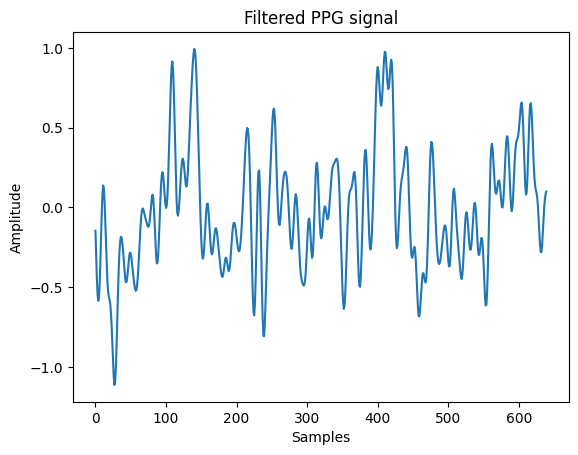

In [14]:
plt.plot(filtered_ppg_signals[4])
plt.title('Filtered PPG signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
plt.close()

In [15]:
# Assuming you have a list or array of PPG signals, e.g., ppg_signals
# ppg_signals should be a list where each element represents a signal

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Initialize an empty list to store scaled signals
scaled_ppg_signals = []

# Iterate over each PPG signal and apply MinMax scaling
for signal in filtered_ppg_signals:
    # Convert the list to a numpy array
    signal_array = np.array(signal)
    # Reshape the signal array to ensure it's a 2D array with one feature
    signal_reshaped = signal_array.reshape(-1, 1)
    # Fit the scaler on the signal and transform it
    scaled_signal = scaler.fit_transform(signal_reshaped)
    # Append the scaled signal to the list
    scaled_ppg_signals.append(scaled_signal)

# scaled_ppg_signals now contains the MinMax scaled PPG signals

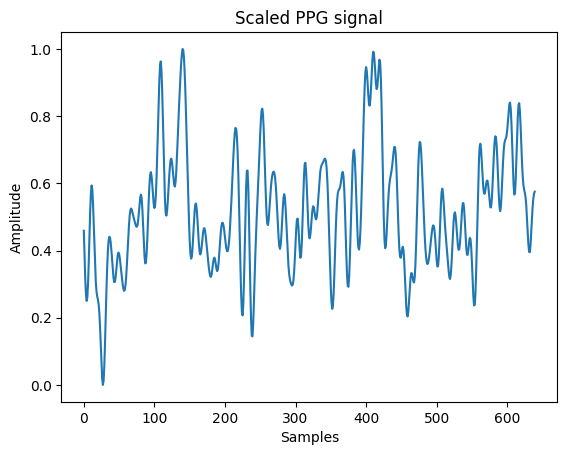

In [16]:
plt.plot(scaled_ppg_signals[4])
plt.title('Scaled PPG signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
plt.close()

Pad sequences to make them have the same length

In [ ]:
# Assuming filtered_ppg_signals is a list of numpy arrays
max_length = max(len(signal) for signal in scaled_ppg_signals)

# Pad the sequences to the maximum length
X_padded = pad_sequences(scaled_ppg_signals, maxlen=max_length, dtype='float32', padding='post', truncating='post')

In [15]:
np.save('preprocessed_ppg512hz', X_padded)

In [16]:
np.save('y_ppg512hz', y)